<a href="https://colab.research.google.com/github/IgorQuaresma/-bootcamp_alura_projetos/blob/main/bootcamp_alura_projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Projeto de Análise do histórico de casos de tuberculose nas Unidades Federativas.

Casos notificados de tuberculose (2001 até 2020)

*Dados retirados da base de dados do datasus



O que é Tuberculose? 

A tuberculose é uma doença infecto contagiosa transmitida pela bactéria Mycobacterium tuberculosis, o bacilo de Koch, e tem como principais sintomas tosse por mais de duas semanas, produção de catarro, febre, sudorese, cansaço e dor no peito.

A transmissão da tuberculose é quase que exclusivamente por vias aéreas. Através da tosse de uma pessoa com tuberculose pulmonar são eliminadas gotículas contendo o microorganismo e podem infectar uma pessoa em contato íntimo e prolongado.

###Importando os dados 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
#Criar variável de acesso aos dados (repositório do github)
url = 'https://raw.githubusercontent.com/IgorQuaresma/-bootcamp_alura_projetos/main/Dados/A005906189_28_143_208.csv'

In [3]:
#Lendo os dados
dados = pd.read_csv(url, encoding="ISO-8859-1",
                    skiprows = 3, sep=";", skipfooter=19,
                    thousands=".", decimal=",")


dados = dados[dados.columns[0:-1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [4]:
dados =dados.rename(columns={'UF de residência':'UF_res'})

In [5]:
#Primeira visão geral de estatísticas básicas do dataset  
dados.describe()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.00000
mean,3116.607143,3316.392857,3349.035714,3320.678571,3287.678571,3036.821429,3021.428571,3098.857143,3082.785714,3049.321429,3136.178571,3077.964286,3078.857143,3043.321429,3051.857143,3078.821429,3260.750000,3412.107143,3486.750000,2988.50000
std,4597.990345,4586.776641,4459.765037,4330.591560,4245.612961,4178.295941,4111.943070,4263.911556,4174.130873,4195.821273,4319.729905,4222.261229,4253.299275,4314.703364,4393.309254,4426.988610,4706.950469,4800.181650,4804.473337,4168.66708
min,144.000000,172.000000,198.000000,215.000000,147.000000,31.000000,51.000000,68.000000,64.000000,70.000000,70.000000,69.000000,62.000000,1.000000,55.000000,62.000000,65.000000,59.000000,69.000000,41.00000
25%,671.500000,772.750000,828.500000,924.750000,905.750000,649.250000,572.750000,656.750000,678.000000,607.000000,674.500000,671.500000,700.500000,736.000000,691.250000,762.500000,768.500000,799.750000,809.500000,685.25000
50%,1376.500000,1372.500000,1442.000000,1461.000000,1459.000000,1341.500000,1283.000000,1367.500000,1371.500000,1369.500000,1386.000000,1438.000000,1402.000000,1309.000000,1319.500000,1239.000000,1358.500000,1515.000000,1488.500000,1385.00000
75%,3303.000000,4009.500000,4175.000000,4227.750000,4194.500000,3908.500000,3908.250000,4000.750000,4271.750000,4199.750000,4378.000000,4128.000000,4083.000000,3904.000000,4016.750000,4050.750000,4108.500000,4292.500000,4392.000000,3739.50000
max,19139.000000,19046.000000,18389.000000,17601.000000,17539.000000,18054.000000,17618.000000,18430.000000,17807.000000,18178.000000,19045.000000,18641.000000,19481.000000,19995.000000,20334.000000,20536.000000,22064.000000,22214.000000,21899.000000,19015.00000


###A região do país desempenha um grande fator na incidência de casos?

Verificar se a região desempenha um grande fator na incidência de casos.

In [6]:
#Definir as UFs como indices
estados  = dados.set_index('UF_res')
estados.head()


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
UF_res,,,,,,,,,,,,,,,,,,,,
11 Rondônia,672,637,648,627,630,521,551,566,681,571,680,692,699,679,653,763,773,676,739,575
12 Acre,357,364,367,353,319,389,305,298,352,340,389,392,391,440,348,443,485,483,585,539
13 Amazonas,2330,2279,2369,2557,2485,2429,2454,2691,2617,2753,2685,2842,3066,3173,3420,3271,3683,3789,3944,3493
14 Roraima,144,172,198,215,147,138,132,148,139,139,164,131,166,143,172,158,209,266,325,289
15 Pará,3600,3882,4038,4146,4040,3831,3821,3842,4140,4161,4370,4093,4167,3985,4031,4254,4546,4721,5565,4461


In [7]:
#Criar coluna com as regioes de cada regiao

dicionario_regioes = {'1':'Norte', '2':'Nordeste', '3':'Sudeste', '4':'Sul', '5':'Centro-Oeste'}

estados['Regiao'] = estados.index.map(lambda x : x.split()[0][0])
estados['Regiao'] = estados['Regiao'].map(dicionario_regioes)
estados.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Regiao
UF_res,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,672,637,648,627,630,521,551,566,681,571,680,692,699,679,653,763,773,676,739,575,Norte
12 Acre,357,364,367,353,319,389,305,298,352,340,389,392,391,440,348,443,485,483,585,539,Norte
13 Amazonas,2330,2279,2369,2557,2485,2429,2454,2691,2617,2753,2685,2842,3066,3173,3420,3271,3683,3789,3944,3493,Norte
14 Roraima,144,172,198,215,147,138,132,148,139,139,164,131,166,143,172,158,209,266,325,289,Norte
15 Pará,3600,3882,4038,4146,4040,3831,3821,3842,4140,4161,4370,4093,4167,3985,4031,4254,4546,4721,5565,4461,Norte


Ver como funciona o comportamento da ocorrência de casos em cada uma das regiões brasileiras. Agrupar os dados por cada região

In [8]:
agrupado_regioes = estados.groupby('Regiao').sum()
agrupado_regioes

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Regiao,,,,,,,,,,,,,,,,,,,,
Centro-Oeste,4039,3777,3991,3738,3953,3628,3604,3674,3585,3699,3833,4226,4475,4235,3983,4048,4133,4542,4579,3681
Nordeste,25672,26242,27536,27655,27875,24777,24173,24493,24885,23878,24413,23755,23088,22402,22215,22556,24242,25732,25743,21790
Norte,7634,7931,8165,8440,8150,7814,7767,8020,8415,8389,8765,8600,8904,8811,9029,9374,10174,10444,11759,9831
Sudeste,39113,43298,42072,41067,40244,38985,38591,39829,38475,38339,39441,38375,38416,38602,39145,39494,41367,42724,42698,37693
Sul,10137,10793,11121,11033,10901,9796,10414,10684,10894,11006,11291,11158,11263,11162,11025,10673,11320,12038,12781,10642


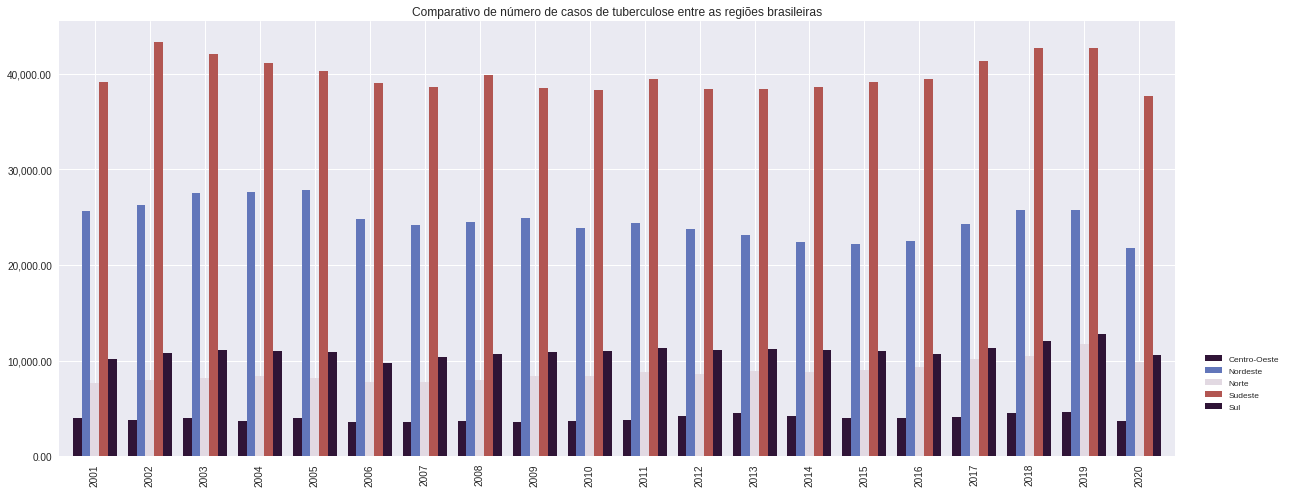

In [9]:
plt.style.use('seaborn')

ax = agrupado_regioes.T.plot(kind='bar', figsize=(20,8), width=0.8, cmap=plt.get_cmap('twilight_shifted'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.81, -0.25,0.5, 0.5)), title_fontsize=30)
plt.rcParams.update({'font.size': 15})
plt.title('Comparativo de número de casos de tuberculose entre as regiões brasileiras')
plt.show()


Percebe-se que a região sudeste sempre apresentou a maior quantidade de casos de tuberculose. Em seguida, tem-se a região Nordeste, a região Sul, a região Norte e por fim, a região Centro-Oeste. 

A região sudeste concentra o maior número de residentes no Brasil, portanto, espera-se que com mais pessoas a quantidade de casos possa ser maior. Para aprofundar a análise, deve-se realizar a mesma análise, porém, considerando a normalização pela população de cada uma das regiões.



Importar dados de população da base do IBGE

In [10]:
populacao = pd.read_csv('https://raw.githubusercontent.com/IgorQuaresma/-bootcamp_alura_projetos/main/Dados/estimativa_pop_2020.csv', header=1, skipfooter=7)
populacao = populacao.drop(['Unnamed: 1','Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1)
populacao = populacao.set_index('BRASIL E UNIDADES DA FEDERAÇÃO')
populacao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,POPULAÇÃO ESTIMADA
BRASIL E UNIDADES DA FEDERAÇÃO,
Brasil,"211,755,692"
Região Norte,"18,672,591"
Rondônia,"1,796,460"
Acre,"894,470"
Amazonas,"4,207,714"
Roraima,"631,181"
Pará,"8,690,745"
Amapá,"861,773"
Tocantins,"1,590,248"


Fonte: IBGE (https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=downloads). 


Estimativa do ano de 2020.

In [11]:
#Selecionando apenas as celulas das regioes 
populacao_regiao = populacao[populacao.index.str.contains("Região")]

populacao_regiao['POPULAÇÃO ESTIMADA'] = populacao_regiao['POPULAÇÃO ESTIMADA'].map(lambda x : x.replace(',','')).astype('int')

#Formatar o dataframe para depois realizar um merge com o dataframe dos casos de tuberculose por regiao
populacao_regiao = populacao_regiao.sort_values('POPULAÇÃO ESTIMADA', ascending=False)
populacao_regiao.index = ['Sudeste','Nordeste','Sul','Norte','Centro-Oeste']
populacao_regiao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,POPULAÇÃO ESTIMADA
Sudeste,89012240
Nordeste,57374243
Sul,30192315
Norte,18672591
Centro-Oeste,16504303


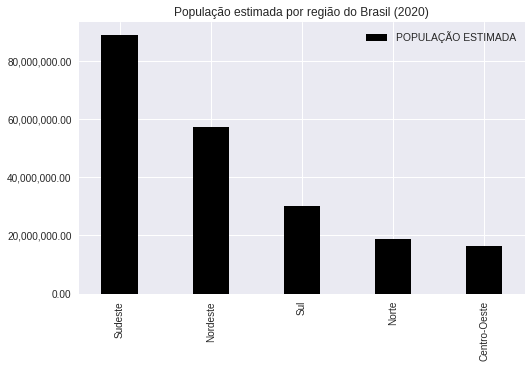

In [12]:
#Grafico populacao por Região
ax = populacao_regiao.plot(kind='bar', figsize=(8,5), width=0.4, color='black')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(loc="upper right", fontsize="x-small", title_fontsize=30)
plt.xlabel('')
plt.rcParams.update({'font.size': 15})
plt.title('População estimada por região do Brasil (2020)')
plt.show()

A partir do gráfico se observa a população estimada para cada uma das regiões Brasileiras. A fim de deixar a análise mais assertiva, realizar-se-á a normalização dos dados de casos de tuberculose pela respectiva população de cada uma das regiões. Considerar-se-á para todos os anos da série analisada  a população estimada para o ano de 2020 apenas.

In [13]:
#Juntar os dataframes agrupado_regioes e populacao_regiao
agrupado_regioes_normalizado = agrupado_regioes.merge(populacao_regiao, left_index=True, right_index=True).T
agrupado_regioes_normalizado

,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
2001,4039,25672,7634,39113,10137
2002,3777,26242,7931,43298,10793
2003,3991,27536,8165,42072,11121
2004,3738,27655,8440,41067,11033
2005,3953,27875,8150,40244,10901
2006,3628,24777,7814,38985,9796
2007,3604,24173,7767,38591,10414
2008,3674,24493,8020,39829,10684
2009,3585,24885,8415,38475,10894
2010,3699,23878,8389,38339,11006


In [14]:
#Normalizar os dados pela população

agrupado_regioes_normalizado['Centro-Oeste'] = (agrupado_regioes_normalizado['Centro-Oeste'] / agrupado_regioes_normalizado['Centro-Oeste'][-1])*100
agrupado_regioes_normalizado['Nordeste'] = (agrupado_regioes_normalizado['Nordeste'] / agrupado_regioes_normalizado['Nordeste'][-1])*100
agrupado_regioes_normalizado['Norte'] = (agrupado_regioes_normalizado['Norte'] / agrupado_regioes_normalizado['Norte'][-1])*100
agrupado_regioes_normalizado['Sudeste'] = (agrupado_regioes_normalizado['Sudeste'] / agrupado_regioes_normalizado['Sudeste'][-1])*100
agrupado_regioes_normalizado['Sul'] = (agrupado_regioes_normalizado['Sul'] / agrupado_regioes_normalizado['Sul'][-1])*100

#Excluir coluna Populacao estimada
agrupado_regioes_normalizado = agrupado_regioes_normalizado.T.drop('POPULAÇÃO ESTIMADA', axis=1)



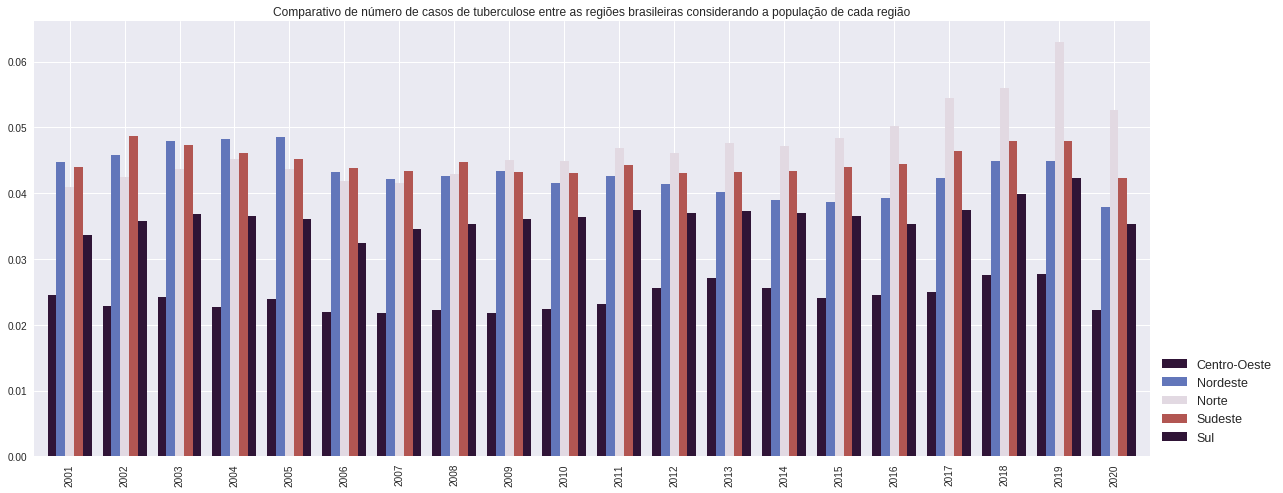

In [15]:
ax = agrupado_regioes_normalizado.T.plot(kind='bar', figsize=(20,8), width=0.8, cmap=plt.get_cmap('twilight_shifted'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.81, -0.25,0.5, 0.5)), title_fontsize=30)
plt.rcParams.update({'font.size': 15})
plt.title('Comparativo de número de casos de tuberculose entre as regiões brasileiras considerando a população de cada região')
plt.show()


Percebe-se que ao considerar a população em cada uma das regiões os resultados obtidos são diferentes da análise realizada sem a população. Norte, SUdeste e Nordeste constam no top 3 localidades com mais casos.

Nos últimos anos da série analisada, desde o ano de 2009 o Norte figurou como local com maior quantidade de casos. Há uma explicação para isso? Quais estados dessa região tem uma maior representatividade no número de incidência de casos.

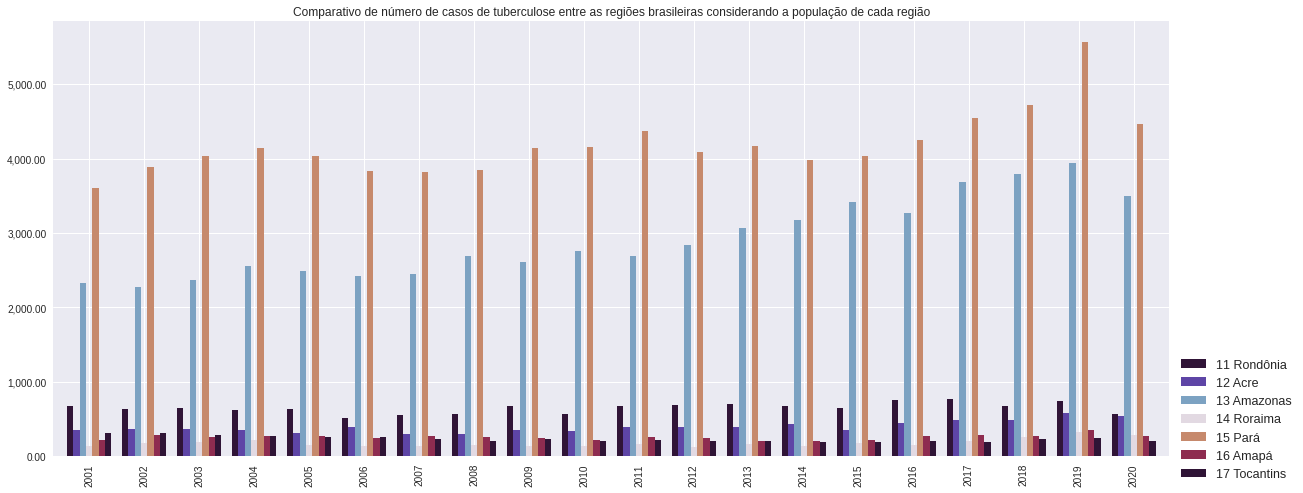

In [16]:
estados_norte = estados[estados['Regiao'] == 'Norte']
estados_norte = estados_norte.drop('Regiao', axis=1)

ax = estados_norte.T.plot(kind='bar', figsize=(20,8), width=0.8, cmap=plt.get_cmap('twilight_shifted'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
ax.legend(loc="upper center", fontsize="small", bbox_to_anchor=((0.81, -0.25,0.5, 0.5)), title_fontsize=30)
plt.rcParams.update({'font.size': 15})
plt.title('Comparativo de número de casos de tuberculose entre as regiões brasileiras considerando a população de cada região')
plt.show()

Pará e Amazonas constam como os estados com maior representatividade na incidência de casos na região Norte. 

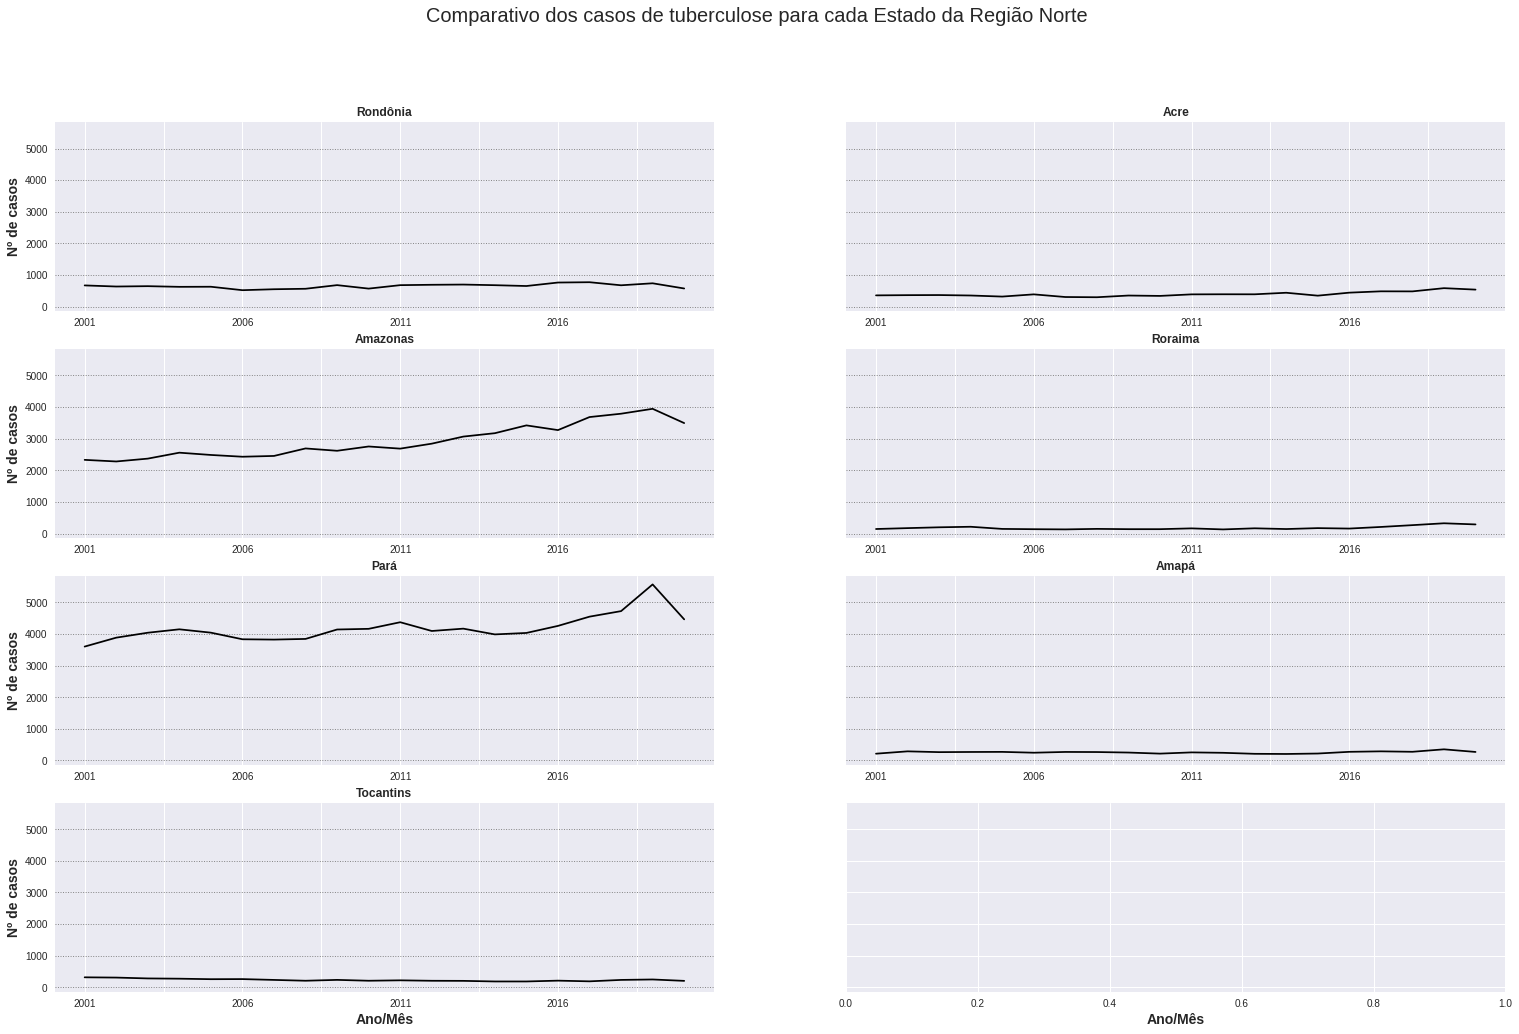

In [17]:
#criando figura
fig, axes = plt.subplots(4,2, sharex=False, sharey=True, figsize=(26 ,16))


estados_norte.loc['11 Rondônia'].plot(ax=axes[0,0], color = 'black')
estados_norte.loc['12 Acre'].plot(ax=axes[0,1], color = 'black')
estados_norte.loc['13 Amazonas'].plot(ax=axes[1,0], color = 'black')
estados_norte.loc['14 Roraima'].plot(ax=axes[1,1], color = 'black')
estados_norte.loc['15 Pará'].plot(ax=axes[2,0], color = 'black')
estados_norte.loc['16 Amapá'].plot(ax=axes[2,1], color = 'black')
estados_norte.loc['17 Tocantins'].plot(ax=axes[3,0], color = 'black')

#identificando as regiões
axes[0,0].set_title('Rondônia', fontweight="bold")
axes[0,1].set_title('Acre', fontweight="bold")
axes[1,0].set_title('Amazonas', fontweight="bold")
axes[1,1].set_title('Roraima', fontweight="bold")
axes[2,0].set_title('Pará', fontweight="bold")
axes[2,1].set_title('Amapá', fontweight="bold")
axes[3,0].set_title('Tocantins', fontweight="bold")


#colocando grids
axes[0,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[0,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[1,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[1,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[2,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[2,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[3,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)

#Titulo geral
plt.suptitle('Comparativo dos casos de tuberculose para cada Estado da Região Norte', fontsize = 20)
#eixos y
axes[0,0].set_ylabel('Nº de casos', fontweight = 'bold', fontsize = 14)
axes[1,0].set_ylabel('Nº de casos',fontweight = 'bold', fontsize = 14)
axes[2,0].set_ylabel('Nº de casos',fontweight = 'bold', fontsize = 14)
axes[3,0].set_ylabel('Nº de casos',fontweight = 'bold', fontsize = 14)
#eixos x
axes[3,0].set_xlabel('Ano/Mês', fontweight = 'bold', fontsize = 14)
axes[3,1].set_xlabel('Ano/Mês', fontweight = 'bold', fontsize = 14)


plt.show()

Verifica-se que dentre todos os estados da região Norte, apenas o Pará e o Amazonas possuem uma tendência de crescimento no número de casos nos últimos anos.

A tuberculose é uma doença atrelada principalemente as condições de vida. Pessoas que vivem em regiões mal assistidas em questão de infraestrutura, possuem uma maior facilidade de infecção pela bactéria causadora da doença. 

Esse aumento dos casos pode sugerir uma piora das condições de vida da população desses dois estados (Pará e Amazonas), por exemplo, populações ribeirinhas que vivem em casas que não contam com sistema de água e esgoto e que possuem diversos indivíduos morando em uma pequena moradia.

Regiões como as favelas também tem potencial para a existência de diversos casos, haja vista todos os pontos já citados. Normalmente, a existência de favelas ocorre principalmente em grandes centros urbanos, onde uma população mais humilde busca moradia. Pode-se realizar os gráficos desses centros urbanos e verificar se também há essa têndencia de aumento nesses locais.

Conforme dados da agência de notícias do IBGE (https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/27728-quase-dois-tercos-das-favelas-estao-a-menos-de-dois-quilometros-de-hospitais#:~:text=A%20Rocinha%2C%20no%20Rio%2C%20%C3%A9,19.262%20domic%C3%ADlios%20em%20aglomerados%20subnormais.) Os domicílios ocupados em aglomerados subnormais são predominantes no Amazonas, o que pode ser um dos fatores que contribuem para maior disseminação da bactéria da tuberculose.



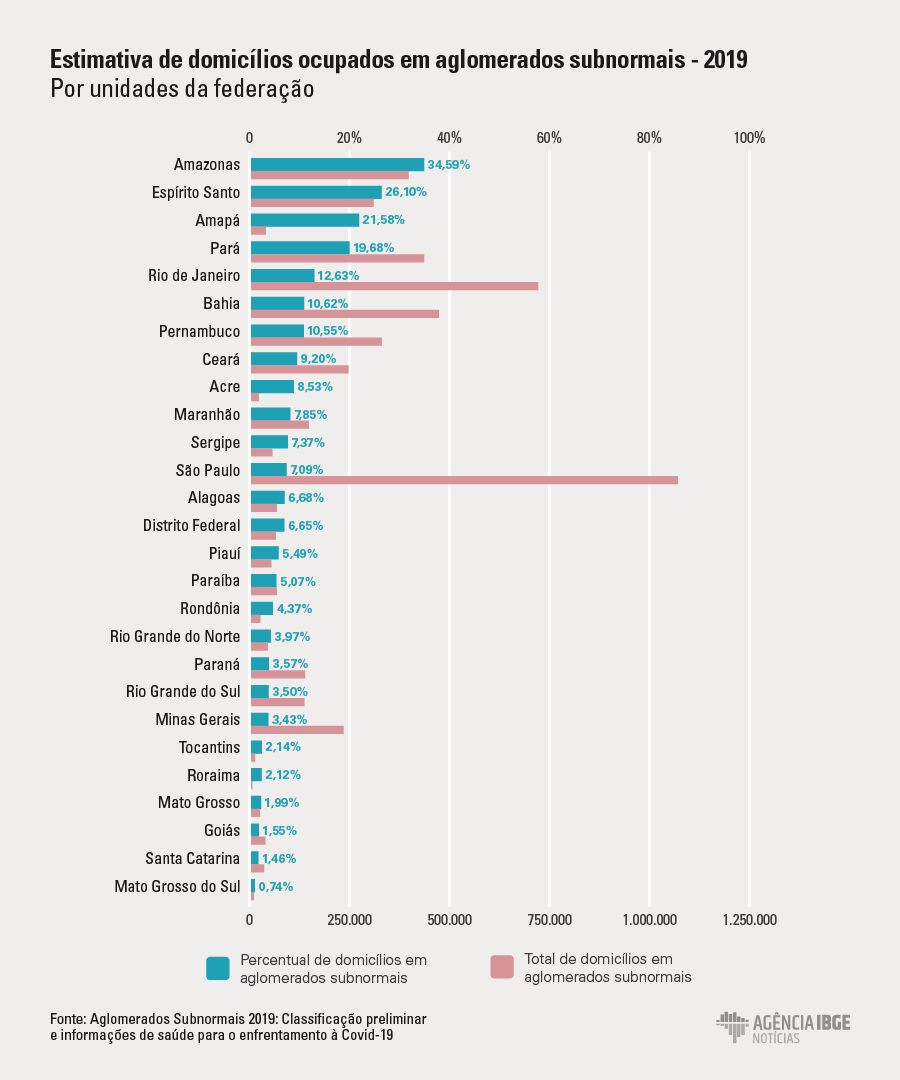

In [19]:
from IPython.display import Image
Image(filename='/content/graficos-aglomerados-uf_1.png')

Fazendo a comparação dos casos com o top5 estados com ocupação de aglomerados subnormais

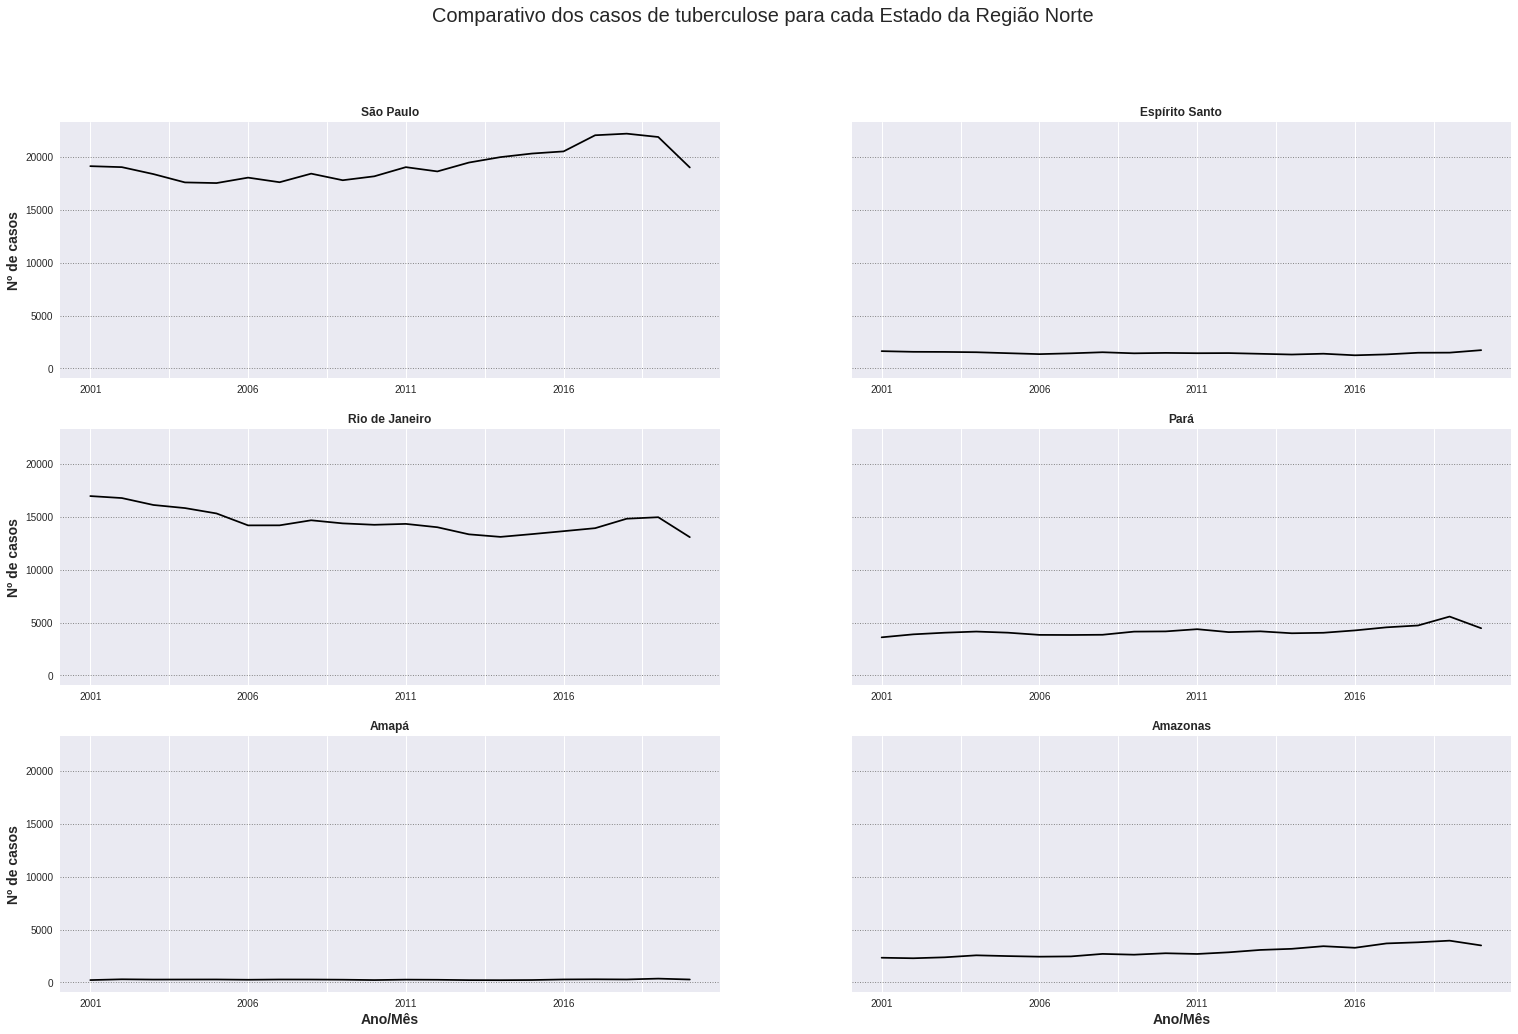

In [20]:

estados_sudeste = estados[estados['Regiao'] == 'Sudeste']


#criando figura
fig, axes = plt.subplots(3,2, sharex=False, sharey=True, figsize=(26 ,16))

estados_sudeste.loc['35 São Paulo'][:-1].plot(ax=axes[0,0], color = 'black')
estados_sudeste.loc['32 Espírito Santo'][:-1].plot(ax=axes[0,1], color = 'black')
estados_sudeste.loc['33 Rio de Janeiro'][:-1].plot(ax=axes[1,0], color = 'black')
estados_norte.loc['15 Pará'].plot(ax=axes[1,1], color = 'black')
estados_norte.loc['16 Amapá'].plot(ax=axes[2,0], color = 'black')
estados_norte.loc['13 Amazonas'].plot(ax=axes[2,1], color = 'black')

#identificando as regiões
axes[0,0].set_title('São Paulo', fontweight="bold")
axes[0,1].set_title('Espírito Santo', fontweight="bold")
axes[1,0].set_title('Rio de Janeiro', fontweight="bold")
axes[1,1].set_title('Pará', fontweight="bold")
axes[2,0].set_title('Amapá', fontweight="bold")
axes[2,1].set_title('Amazonas', fontweight="bold")



#colocando grids
axes[0,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[0,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[1,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[1,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[2,0].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)
axes[2,1].grid(axis='y',color='gray', linestyle=':', linewidth=0.95)


#Titulo geral
plt.suptitle('Comparativo dos casos de tuberculose para cada Estado da Região Norte', fontsize = 20)
#eixos y
axes[0,0].set_ylabel('Nº de casos', fontweight = 'bold', fontsize = 14)
axes[1,0].set_ylabel('Nº de casos',fontweight = 'bold', fontsize = 14)
axes[2,0].set_ylabel('Nº de casos',fontweight = 'bold', fontsize = 14)

#eixos x
axes[2,0].set_xlabel('Ano/Mês', fontweight = 'bold', fontsize = 14)
axes[2,1].set_xlabel('Ano/Mês', fontweight = 'bold', fontsize = 14)


plt.show()

São Paulo possui uma tendência de aumento mais abrupta de casos. Amazonas e Pará também apresenta essa têndencia, porém de forma mais suave. O Rio de Janeiro, de forma contrária, possui uma tendência de queda dos casos notificados. 

A forma mais eficiente para previnir a tuberculose é a vacinação. Essa está disponível pelo prórpia SUS ou em clínicas particulares no Brasil. 

Como no ano de 2020, devido a Pandemia de Covid-19, muitos indivíduos não se vacinaram contra a tuberculose, ocorreu uma maior incidência de casos desse ano em relação aos demais anos analisados na série?